<a href="https://colab.research.google.com/github/dlguswn3659/class-MachineLearning/blob/master/assignment7-06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

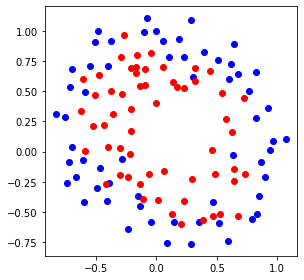

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.animation as animation
from scipy import stats 
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_regression 
import csv
import math
# from google.colab import files

# uploaded = files.upload()

data    = np.genfromtxt("data-nonlinear.txt", delimiter=',')

pointX  = data[:, 0]
pointY  = data[:, 1]
label   = data[:, 2]

pointX0 = pointX[label == 0]
pointY0 = pointY[label == 0]

pointX1 = pointX[label == 1]
pointY1 = pointY[label == 1]

# plt.figure()
# plt.scatter(pointX0, pointY0, c='b')
# plt.scatter(pointX1, pointY1, c='r')
# plt.tight_layout()
# plt.gca().set_aspect('equal', adjustable='box')
# plt.show()

In [0]:
X = pointX #전체 x
y = np.array(pointY,dtype=float)
label = np.array(label,dtype=float)
# print(len(y))

In [0]:
def g_function(X, y, theta, it, i):
  result = 0
  for m in range(0, 10): 
    for n in range(0, 10):
      result = result + theta[m*10 + n][it]*(X[i]**m)*(y[i]**n)

  return result
  # return  (theta[0][it] + theta[1][it]*X[i] + theta[2][it]*y[i] + theta[3][it]*X[i]*X[i] +
  #         theta[4][it]*X[i]*y[i] + theta[5][it]*y[i]*y[i] + theta[6][it]*X[i]*X[i]*X[i] + theta[7][it]*X[i]*X[i]*y[i] +
  #         theta[8][it]*X[i]*y[i]*y[i] + theta[9][it]*y[i]*y[i]*y[i] + theta[10][it]*X[i]*X[i]*X[i]*X[i] + theta[11][it]*X[i]*X[i]*X[i]*y[i] +
  #         theta[12][it]*X[i]*X[i]*y[i]*y[i] + theta[13][it]*X[i]*y[i]*y[i]*y[i] + theta[14][it]*y[i]*y[i]*y[i]*y[i] 
  #         #  + theta[15][it]*X[i]*X[i]*X[i]*X[i]*X[i]
  #          )

In [0]:
def gradient_descent(X,y,label,theta,learning_rate,iterations, controller):
    
    m = len(y)

    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,100))
    
    differential_g_function = np.zeros(100)

    for it in range(iterations):
        print(it)
        pred = 0
        preds = np.zeros(100)
        sum_theta = 0

        for i in range(0, m):
          for p in range(0, 10): 
            for n in range(0, 10):
              differential_g_function[p*10 + n] = (X[i]**p)*(y[i]**n)
          # print(i)
          #cost 함수
          # print('100바퀴 이거 오래걸리나?')
          pred = pred + ((-1)*label[i]*math.log(1/(1 + math.exp((-1)*g_function(X, y, theta, it, i))))-((1-label[i])*math.log(1 + (-1)*(1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))))))
          
          #  σ(z)   =    (1/(1 + math.exp((-1)*(theta[0][it] + theta[1][it]*X[i] + theta[2][it]*y[i]))))

          #theta함수
          for j in range(0, 100):
            preds[j] = preds[j] + ((1/(1 + math.exp((-1)*g_function(X, y, theta, it, i)))) - label[i])*differential_g_function[j]
            # (y[i]**(j%10))
        
        for i in range(0, 100):
          theta[i][it + 1] = theta[i][it] - learning_rate*((1/m)*preds[i] + controller*theta[i][it])
          # print(theta[i][it])
        # print('100바퀴 이거 오래걸리나?')

        for i in range(0, 100):
          theta_history[it][i] = theta[i][it]

        for p in range(0, 10): 
          for n in range(0, 10):
            sum_theta = sum_theta + (theta[p*10 + n][it]**2)
            # print(theta[p*10 + n][it]**2)

        # print(controller)
        # print(sum_theta)
        # print(pred)
        cost_history[it]  = (1/m) * pred + (controller/2)*sum_theta
        print(cost_history[it])
        
    return theta, cost_history, theta_history

In [32]:
lr =0.5
n_iter = 150

theta = np.zeros((150, n_iter + 1))
theta2 = np.zeros((150, n_iter + 1))  
theta3 = np.zeros((150, n_iter + 1))  

X_b = np.c_[np.ones((len(X),0)),X]
X_b = np.array(X_b,dtype=float)
# print(X_b.shape)
# print(X_b.dtype)
# print(y.dtype)
control_lambda1 = 0.00000001
theta,cost_history,theta_history = gradient_descent(X_b,y,label,theta,lr,n_iter, control_lambda1)

control_lambda2 = 1
theta2,cost_history2,theta_history2 = gradient_descent(X_b,y,label,theta,lr,n_iter, control_lambda2)

lr =0.0001
control_lambda3 = 1000
theta3,cost_history3,theta_history3 = gradient_descent(X_b,y,label,theta,lr,n_iter, control_lambda3)

0
0.6931471805599461
1
0.6843243600903024
2
0.6770026718949668
3
0.6707325125098804
4
0.6652140278552756
5
0.6602479702867787
6
0.6557009540833092
7
0.6514823059233034
8
0.6475290767062891
9
0.6437964499505124
10
0.640251615813621
11
0.6368698437949657
12
0.6336319462074748
13
0.6305226232689702
14
0.6275293699259649
15
0.6246417431046283
16
0.6218508621757897
17
0.6191490617903942
18
0.6165296453756172
19
0.6139867059800908
20
0.6115149928414698
21
0.6091098095150389
22
0.6067669342013131
23
0.6044825560156936
24
0.6022532229658732
25
0.6000757987299834
26
0.5979474262065385
27
0.5958654963936211
28
0.5938276215505117
29
0.5918316118654452
30
0.5898754550407234
31
0.5879572983386125
32
0.5860754327263931
33
0.5842282788285009
34
0.5824143744457677
35
0.5806323634416262
36
0.5788809858262693
37
0.5771590688945893
38
0.5754655192938696
39
0.5737993159138334
40
0.5721595035055652
41
0.57054518694757
42
0.5689555260872847
43
0.5673897310949914
44
0.5658470582745472
45
0.5643268062818394
4

0.6843243600903024


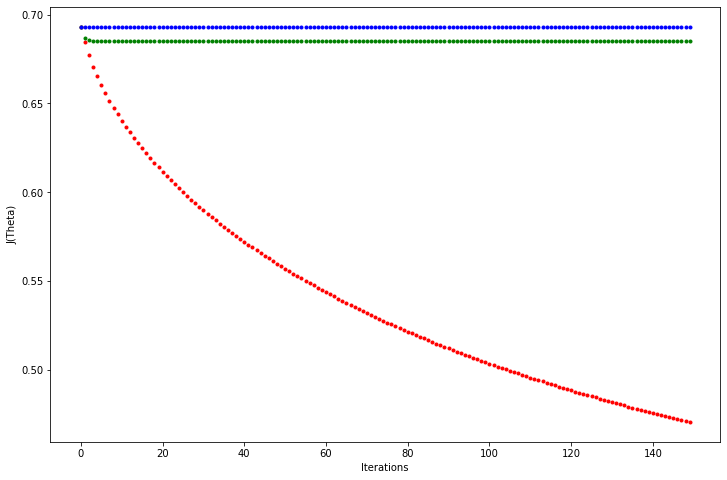

In [33]:
fig,ax = plt.subplots(figsize=(12,8))

print(cost_history[1])

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.', color = 'red')
_=ax.plot(range(n_iter),cost_history2,'b.', color = 'green')
_=ax.plot(range(n_iter),cost_history3,'b.', color = 'blue')

In [34]:
%pylab inline 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [0]:
def sigmoid(z): 
  g = 1 / (1 + np.exp(-z)) 
  
  return g 
  
# print('sigmoid(10) = %s, sigmoid(-10) = %s, sigmoid(0) = %s' % (sigmoid(10), sigmoid(-10), sigmoid(0)))

In [63]:
def mapFeature(X1, X2): 
  degree =  9
  #print(X1.shape) 
  m = np.size(X1) 
  # out = np.ones(m) 
  res = [] 
  
  # res.append(out) 
  
  for i in np.arange(0, degree + 1): 
    for j in np.arange(0, degree + 1): 
      out1 = (X1 ** i) * (X2 ** j) 
      res.append(out1) 
      
  return np.array(res).T 

data = matrix(data)

X = data[:, 0:2] 
y = data[:, 2] 

X = np.array(X)
y = np.array(y)
      
X_reg = mapFeature(X[:, 0], X[:, 1]) 
# print(X_reg[0:2, :])
print(X_reg.shape)

(118, 100)


In [64]:
import scipy.optimize as op 

def myCostReg(theta, X, y, s_lambda): 
  
  X = matrix(X) 

  J = 0 
  grad = np.zeros(np.size(theta)) 
  m, n = X.shape 
  y = y.reshape((m, 1)) 
  theta = theta.reshape((n, 1)) 

  theta_0 = theta[0] 
  theta_j = theta[1:] 

  theta = np.matrix(theta) 
  sum_theta_square = np.sum(theta_j ** 2) 
  predictions = X * theta 
  sig_term = sigmoid(predictions)

  J = 1/m * sum(np.multiply(-y, log(sig_term)) - np.multiply((1 - y), log(1 - sig_term))) + s_lambda / (2 * m) * sum_theta_square 
  
  return J 
  
def myGradientReg(theta, X, y, s_lambda): 
 
  X = matrix(X) 

  J = 0 
  grad = np.zeros(np.size(theta)) 
  m, n = X.shape 
  y = y.reshape((m, 1)) 
  theta = theta.reshape((n, 1)) 

  theta_0 = theta[0] 
  theta_j = theta[1:] 
 
  theta = np.matrix(theta) 

  predictions = X * theta 
  sig_term = sigmoid(predictions) 

  errors = (sig_term - y) 

  delta_0 = 1/m * errors.T * X[:, 0] 

  delta = 1/m * errors.T * X[:, 1:]

  regular = s_lambda / m * theta_j 
  delta_j = delta.T + regular 
  grad[0] = delta_0 
  grad[1:] = delta_j.T 
   
  return grad.flatten() 
   
initial_theta = np.zeros((X_reg.shape[1], 1)) 

s_lambda = 0.00000001
Result = op.minimize(fun = myCostReg, x0 = initial_theta, args = (X_reg, y, s_lambda), method = 'TNC', jac = myGradientReg); 
cost = Result.fun 
theta = Result.x 

s_lambda2 = 1 
Result2 = op.minimize(fun = myCostReg, x0 = initial_theta, args = (X_reg, y, s_lambda2), method = 'TNC', jac = myGradientReg); 
cost2 = Result2.fun 
theta2 = Result2.x 

s_lambda3 = 1000
Result3 = op.minimize(fun = myCostReg, x0 = initial_theta, args = (X_reg, y, s_lambda3), method = 'TNC', jac = myGradientReg); 
cost3 = Result3.fun 
theta3 = Result3.x 

print(cost)
print(cost2)
print(cost3)

# theta[0] = theta_history[1500][0]
# theta[1] = theta_history[1500][1]
# theta[2] = theta_history[1500][2]
# theta[3] = theta_history[1500][3]
# theta[4] = theta_history[1500][4]
# theta[5] = theta_history[1500][5]
# theta[6] = theta_history[1500][6]
# theta[7] = theta_history[1500][7]
# theta[8] = theta_history[1500][8]
# theta[9] = theta_history[1500][9]
# theta[10] = theta_history[1500][10]
# theta[11] = theta_history[1500][11]
# theta[12] = theta_history[1500][12]
# theta[13] = theta_history[1500][13]
# theta[14] = theta_history[1500][14]

0.17331609404130785
0.5220032740379434
0.6919947549477525


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply


In [0]:
def predict(theta, X): 
  m = matrix(X) 
  m, n = X.shape 
  theta = theta.reshape((n, 1)) 
  theta = matrix(theta) 
  p = np.zeros((m, 1)) 
  p = sigmoid(X * theta) >= 0.5; 
  
  return p 

In [0]:
p = predict(theta, X_reg) 
p2 = predict(theta2, X_reg) 
p3 = predict(theta3, X_reg) 

In [0]:
def plotBoundary(theta, X, y, line_color): 
  
  if np.size(X, 1) <= 3: 
    plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1] + 2)]) 
    plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0]) 
    plot(plot_x, plot_y) 
    plt.legend(('Admitted', 'Not admitted'), loc='upper right') 
  
  else: 

    u = linspace(-1, 1.5, 800) 
    v = linspace(-1, 1.5, 800) 
    z = np.zeros((np.size(u), np.size(v))) 

    for i in np.arange(np.size(u)): 
      for j in np.arange(np.size(v)): 
        z[i, j] = np.sum(mapFeature(u[i], v[j]) * theta) 
        
        z = z.T 

    # plt.figure()
    # plt.scatter(pointX0, pointY0, c='b')
    # plt.scatter(pointX1, pointY1, c='r')
    # plt.tight_layout()
    # plt.gca().set_aspect('equal', adjustable='box')
    plt.contour(u, v, z, colors=line_color) 

In [68]:
accuracy_history = np.zeros(150)
print(X.shape)
print(theta_history[0].shape)

# a = np.array([0])

for i in range(150):
  # theta_history[i].append(0)
  p = predict(theta_history[i], X_reg) 
  accuracy_history[i] = np.mean(double(p == y))

accuracy_history2 = np.zeros(150)

for i in range(150):
  p2 = predict(theta_history2[i], X_reg) 
  accuracy_history2[i] = np.mean(double(p2 == y))

accuracy_history3 = np.zeros(150)

for i in range(150):
  p3 = predict(theta_history3[i], X_reg) 
  accuracy_history3[i] = np.mean(double(p3 == y))

(118, 2)
(100,)


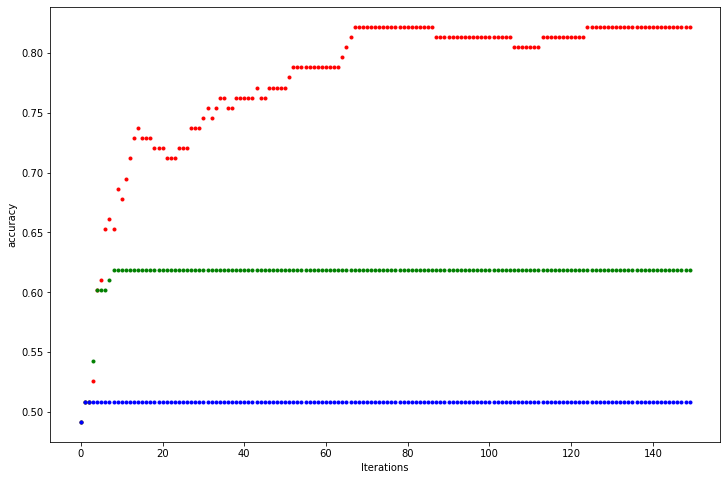

In [70]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('accuracy')
ax.set_xlabel('Iterations')
_=ax.plot(range(150),accuracy_history,'r.', color = 'red')
_=ax.plot(range(150),accuracy_history2,'r.', color = 'green')
_=ax.plot(range(150),accuracy_history3,'r.', color = 'blue')

In [71]:
# print("Train Accuracy:  ", end=' ')
# print(accuracy_history[-1]*100, end='%')
# print("Train Accuracy:  ", end=' ')
# print(accuracy_history2[-1]*100, end='%')
# print("Train Accuracy:  ", end=' ')
# print(accuracy_history3[-1]*100, end='%')
print("Over-fitting Train Accuracy:  ", end=' ')
a = np.mean(double(p == y))
print(a*100, end='%')
print('\n')
print("Just-right Train Accuracy:  ", end=' ')
a = np.mean(double(p2 == y))
print(a*100, end='%')
print('\n')
print("Under-fitting Train Accuracy:  ", end=' ')
a = np.mean(double(p3 == y))
print(a*100, end='%')
print('\n')

Over-fitting Train Accuracy:   82.20338983050848%

Just-right Train Accuracy:   61.86440677966102%

Under-fitting Train Accuracy:   50.847457627118644%



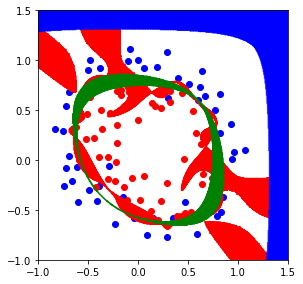

In [72]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')

plotBoundary(theta, X_reg, y, 'red')
plotBoundary(theta2, X_reg, y, 'green')
plotBoundary(theta3, X_reg, y, 'blue')

# **Machine Learning Assignment07** #

Name : 이현주

Student # : 20184060

# **1. Plot the training data [1pt]**

- plot the training data points (x,y) with their labels / in colors (blue for label 0 and red for label 1)

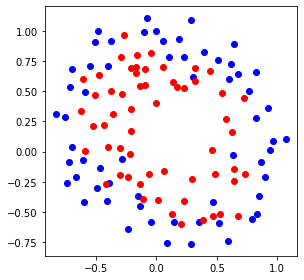

In [73]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# **2. Plot the training error with varying regularization parameters[9pt]**

- choose a value for λ1 in such a way that over-fitting is demonstrated and plot the training error J(θ) at every iteration of gradient descent until convergence (in red color) [3pt]
- choose a value for λ2 in such a way that just-right is demonstrated and plot the training error J(θ) at every iteration of gradient descent until convergence (in green color) [3pt]
- choose a value for λ3​ in such a way that under-fitting is demonstrated and plot the training error J(θ) at every iteration of gradient descent until convergence (in blue color) [3pt]
- the above three curves should be presented all together in a single figure

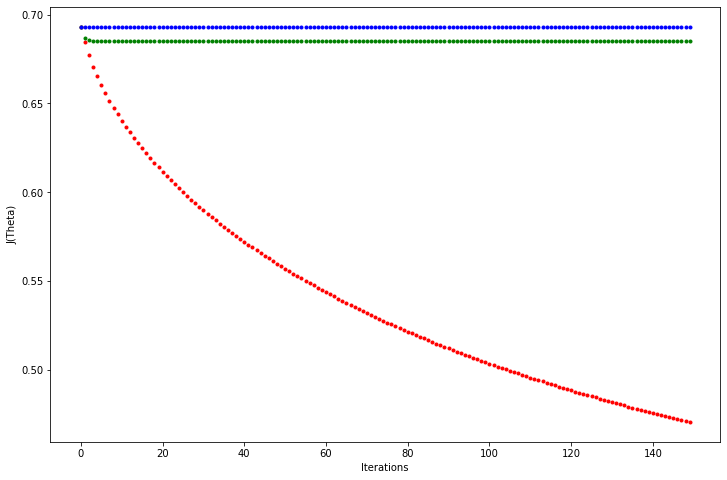

In [74]:
fig,ax = plt.subplots(figsize=(12,8))

# print(cost_history[1])

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(n_iter),cost_history,'b.', color = 'red')
_=ax.plot(range(n_iter),cost_history2,'b.', color = 'green')
_=ax.plot(range(n_iter),cost_history3,'b.', color = 'blue')

# **3. Display the values of the chosen regularization parameters[3pt]**

- display the value of the chosen λ1 for the demonstration of over-fitting (in red color) [1pt]
- display the value of the chosen λ2​ for the demonstration of just-right (in green color) [1pt]
- display the value of the chosen λ3 for the demonstration of under-fitting (in blue color) [1pt]

In [75]:
print("Over-fitting λ1: 0.00000001 ", end=' ')
print('\n')
print("Just-right λ2​: 1 ", end=' ')
print('\n')
print("Under-fitting λ3: 1000 ", end=' ')
print('\n')

Over-fitting λ1: 0.00000001  

Just-right λ2​: 1  

Under-fitting λ3: 1000  



# **4. Plot the training accuracy with varying regularization parameters[9pt]**

- plot the training accuracy with the chosen λ1 for over-fitting at every iteration of gradient descent until convergence (in red color) [3pt]
- plot the training accuracy with the chosen λ2​ for just-right at every iteration of gradient descent until convergence (in green color) [3pt]
- plot the training accuracy with the chosen λ3​ for under-fitting at every iteration of gradient descent until convergence (in blue color) [3pt]
- the above three curves should be presented all together in a single figure

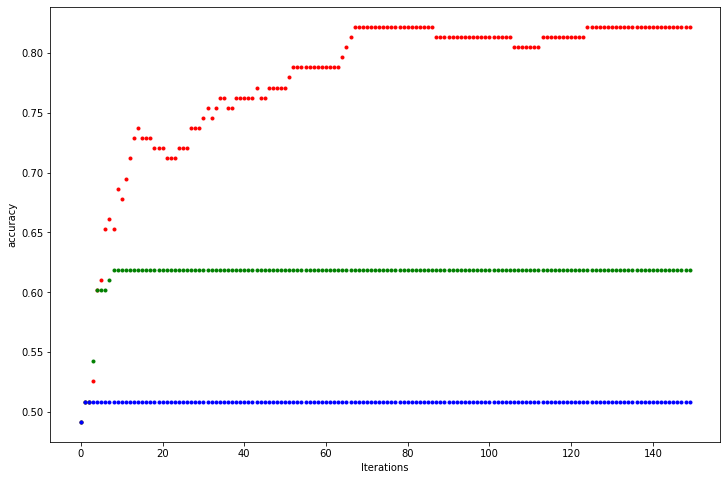

In [76]:
fig,ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('accuracy')
ax.set_xlabel('Iterations')
_=ax.plot(range(150),accuracy_history,'r.', color = 'red')
_=ax.plot(range(150),accuracy_history2,'r.', color = 'green')
_=ax.plot(range(150),accuracy_history3,'r.', color = 'blue')

# **5. Display the final training accuracy with varying regularization parameters[3pt]**

- display the final training accuracy obtained with the chosen λ1​ for over-fitting in number (%) at convergence (in red color) [1pt]
- display the final training accuracy obtained with the chosen λ2​ for just-right in number (%) at convergence (in green color) [1pt]
- display the final training accuracy obtained with the chosen λ3​ for under-fitting in number (%) at convergence (in blue color) [1pt]

In [77]:
print("Over-fitting Train Accuracy:  ", end=' ')
a = np.mean(double(p == y))
print(a*100, end='%')
print('\n')
print("Just-right Train Accuracy:  ", end=' ')
a = np.mean(double(p2 == y))
print(a*100, end='%')
print('\n')
print("Under-fitting Train Accuracy:  ", end=' ')
a = np.mean(double(p3 == y))
print(a*100, end='%')
print('\n')

Over-fitting Train Accuracy:   82.20338983050848%

Just-right Train Accuracy:   61.86440677966102%

Under-fitting Train Accuracy:   50.847457627118644%



# **6. Plot the optimal classifier with varying regularization parameters superimposed on the training data[9pt]**

- plot the boundary of the optimal classifier with the chosen λ1​ for over-fitting at convergence (in red color) [3pt]
- plot the boundary of the optimal classifier with the chosen λ2 for just-right at convergence (in green color) [3pt]
- plot the boundary of the optimal classifier with the chosen λ3​ for under-fitting at convergence (in blue color) [3pt]
- the boundary of the classifier is defined by {(x,y)∣σ(g(x,y;θ))=0.5}={(x,y)∣g(x,y;θ)=0}
- the boundaries of the classifiers with different regularization parameters should be presented with the training data points (x,y) with their labels lll in colors (blue for label 0 and red for label 1)
- you can use contour function in python3

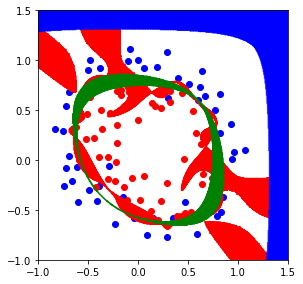

In [78]:
plt.figure()
plt.scatter(pointX0, pointY0, c='b')
plt.scatter(pointX1, pointY1, c='r')
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')

plotBoundary(theta, X_reg, y, 'red')
plotBoundary(theta2, X_reg, y, 'green')
plotBoundary(theta3, X_reg, y, 'blue')